### 2D visualization of coil-20 images   

#### Import libraries  

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, LocallyLinearEmbedding, Isomap, TSNE

#### Parameters  

In [32]:
csv_in = 'dm-end1-1.csv'
n_components = 2
n_neighbors = 20
n_obj = 20
random_state = 6

#### Read CSV file  

In [33]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
# print(df.shape)
# print(df.info())
# display(df.head())

#### Separate data  

In [34]:
df_X = df.loc[:,'pixel_0_0':'pixel_7_7']
obj = df['label']
display(df_X.head())
print(obj.head())

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,4.0,16.0,16.0,16.0,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,16.0,9.0,0.0,0.0,0.0
1,0.0,0.0,0.0,10.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,5.0,7.0,15.0,8.0,0.0
2,0.0,0.0,7.0,16.0,16.0,3.0,0.0,0.0,0.0,7.0,...,3.0,0.0,0.0,0.0,10.0,16.0,16.0,16.0,9.0,0.0
3,0.0,0.0,8.0,16.0,6.0,3.0,0.0,0.0,0.0,2.0,...,1.0,0.0,0.0,0.0,6.0,15.0,16.0,10.0,0.0,0.0
4,0.0,0.0,7.0,12.0,16.0,9.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,10.0,11.0,4.0,0.0,0.0,0.0


0    7
1    1
2    2
3    9
4    5
Name: label, dtype: int64


#### Standardization  

In [35]:
sc = StandardScaler()
X = sc.fit_transform(df_X) 

#### Manifold learning  

/home/anhvu/miniconda3/envs/ds2021/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=20, n_components=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


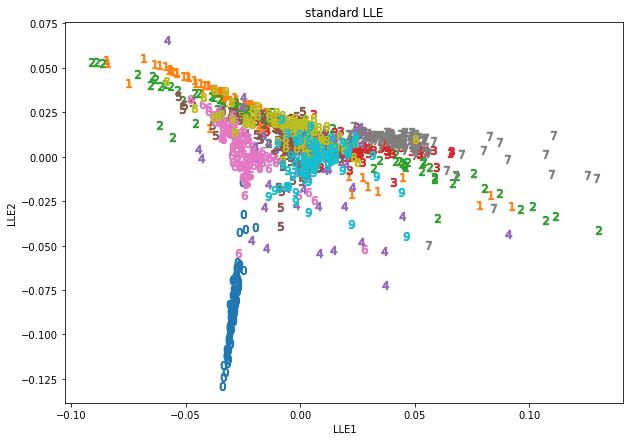

In [36]:
# LLE
Y = LocallyLinearEmbedding(n_neighbors, n_components,
                           eigen_solver='auto',
                           method='standard').fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("standard LLE")
for i in range(n_obj):
    marker = '${}$'.format(i)
    y1 = Y[ obj==i ]
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('LLE1')
plt.ylabel('LLE2')
plt.show()

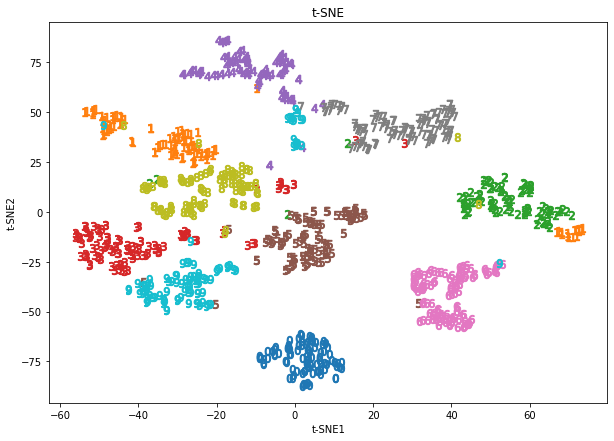

In [37]:
# t-SNE
Y = TSNE(n_components=n_components,
         perplexity=10, n_iter=1000,
         random_state=random_state).fit_transform(X)
plt.figure(figsize=(10,7))
plt.title("t-SNE")
for i in range(n_obj):
    marker = '${}$'.format(i)
    y1 = Y[ obj==i ]
    plt.scatter(y1[:, 0], y1[:, 1], marker=marker, s=70, label=i)
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()